In [34]:
import numpy as np
import matplotlib.pyplot as plt

from numanpy.root_finding import *

In [35]:
class Bond:
    def __init__(self, C, F, T, P):
        """
        Initialize a bond with its parameters.
        
        Parameters:
        C (float): Coupon rate (per period).
        F (float): Face value of the bond.
        T (int): Time periods to maturity.
        P (float): Price of the bond.
        """
        self.C = C
        self.F = F
        self.T = T
        self.P = P
        self._cf = None
        self._t = None

    def f(self, r):
        """
        Auxiliary function to calculate the NPV of the bond.
        
        Parameters:
        r (float): Discount rate.
        
        Returns:
        float: The NPV of the bond.
        """
        self._cf = np.array([self.C * self.F] * self.T + [self.F])
        self._cf = self._cf[self._cf != 0]
        self._t = np.array(np.arange(1, len(self._cf)).tolist() + [self.T])
        fr = np.sum(self._cf / (1 + r) ** self._t) - self.P
        return fr
    
    def df(self, r):
        """
        Auxiliary function to calculate the derivative of the NPV of the bond.
        
        Parameters:
        r (float): Discount rate.
        
        Returns:
        float: The derivative of the NPV function.
        """
        self._cf = np.array([self.C * self.F] * self.T + [self.F])
        self._cf = self._cf[self._cf != 0]
        self._t = np.array(np.arange(1, len(self._cf)).tolist() + [self.T])
        dfr = -np.sum(self._t * self._cf / (1 + r) ** (self._t + 1))
        return dfr

    def ytm(self, method="newton"):
        """
        Calculate the Yield to Maturity (YTM) of the bond.
        
        Returns:
        float: The YTM of the bond.
        """
        if method == "newton":
            y = newton(self.f, self.df, 0, verbose=True)
        elif method == "bisect":
            y = bisect(self.f, 0, 1, verbose=True)
        return y

    def __repr__(self):
        return f"Bond(C={self.C}, F={self.F}, T={self.T}, P={self.P})"

In [36]:
# 5% coupon bond with face value 1000, maturing in 5 years, priced at 900
b1 = Bond(C=0.05, F=1000, T=5, P=900)
# 0% coupon bond with face value 1000, maturing in 2 years, priced at 900
b2 = Bond(C=0, F=1000, T=2, P=900)
print(b1)
print(b2)

Bond(C=0.05, F=1000, T=5, P=900)
Bond(C=0, F=1000, T=2, P=900)


In [37]:
ytm_newton = b1.ytm(method="newton")
print(f"YTM (Newton): {(ytm_newton[-1] * 100):.4f}%")

ytm_bisect = b1.ytm(method="bisect")
print(f"YTM (Bisect): {(ytm_bisect[-1] * 100):.4f}%")

Converged to 0.07469655116265432 after 4 iterations.
YTM (Newton): 7.4697%
Converged to 0.07469654083251953 after 20 iterations.
YTM (Bisect): 7.4697%


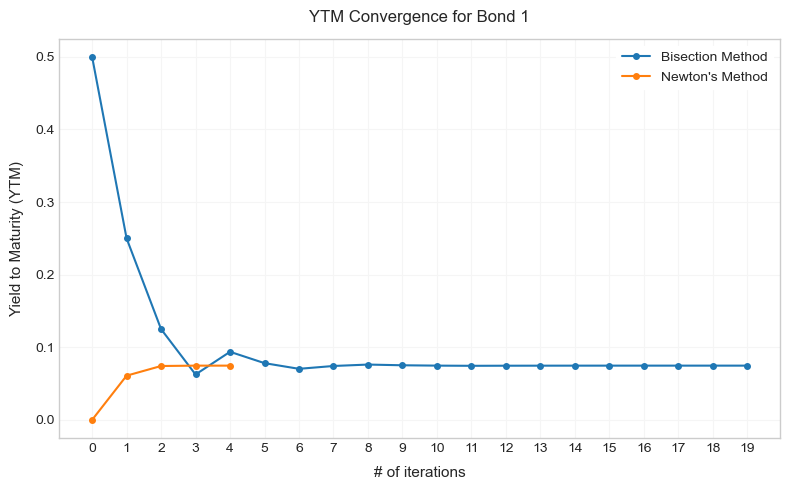

In [38]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5), tight_layout=True)

# Plot root-finding iterations
plt.plot(ytm_bisect, '.-', color='#1f77b4', markersize=8, linewidth=1.5, label='Bisection Method')
plt.plot(ytm_newton, '.-', color='#ff7f0e', markersize=8, linewidth=1.5, label='Newton\'s Method')

plt.xticks(np.arange(0, len(ytm_bisect), 1))
plt.xlabel('# of iterations', fontsize=11, labelpad=8)
plt.ylabel('Yield to Maturity (YTM)', fontsize=11, labelpad=8)

# Title and legend
plt.title('YTM Convergence for Bond 1', fontsize=12, pad=12)
plt.legend(frameon=True, framealpha=1, edgecolor='white')
plt.grid(True, color='#f5f5f5')

plt.show()